<a href="https://colab.research.google.com/github/chayaphon/DADS7202_DL/blob/main/CNN_Sushi/Generate_Numpy_Images.ipynb\" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [6]:
def img_converter(path, size):
    arr = os.listdir(path)
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    x = []
    for filename in arr:
        file_extension = os.path.splitext(filename)[1]
        if file_extension.lower() in valid_extensions:
            filename = path + filename
            img = cv2.imread(filename)
            RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(RGB_img, size)
            x.append(img)
    return x

In [7]:
name_path = {
    'sushi_aburi' : './Images Dataset/aburi/',
    'sushi_ebi' : './Images Dataset/ebi/',
    'sushi_maguro' : './Images Dataset/maguro/',
    'sushi_salmon' : './Images Dataset/salmon/'
}

save_location = './Images Numpy/'
x_all = []

for i, (name, path) in enumerate(name_path.items()):
    size = (299,299)
    x = img_converter(path, size)
    # dst = save_location + f'x_{name}_{size[0]}x{size[1]}'
    # np.save(f'{dst}', x)
    dst = save_location + f'x_{name}_{size[0]}x{size[1]}.npz'
    np.savez_compressed(f'{dst}', x=x)
    x_all.append(x)
    print(f'x shape: {np.array(x).shape}')

x shape: (172, 299, 299, 3)
x shape: (172, 299, 299, 3)
x shape: (172, 299, 299, 3)
x shape: (172, 299, 299, 3)


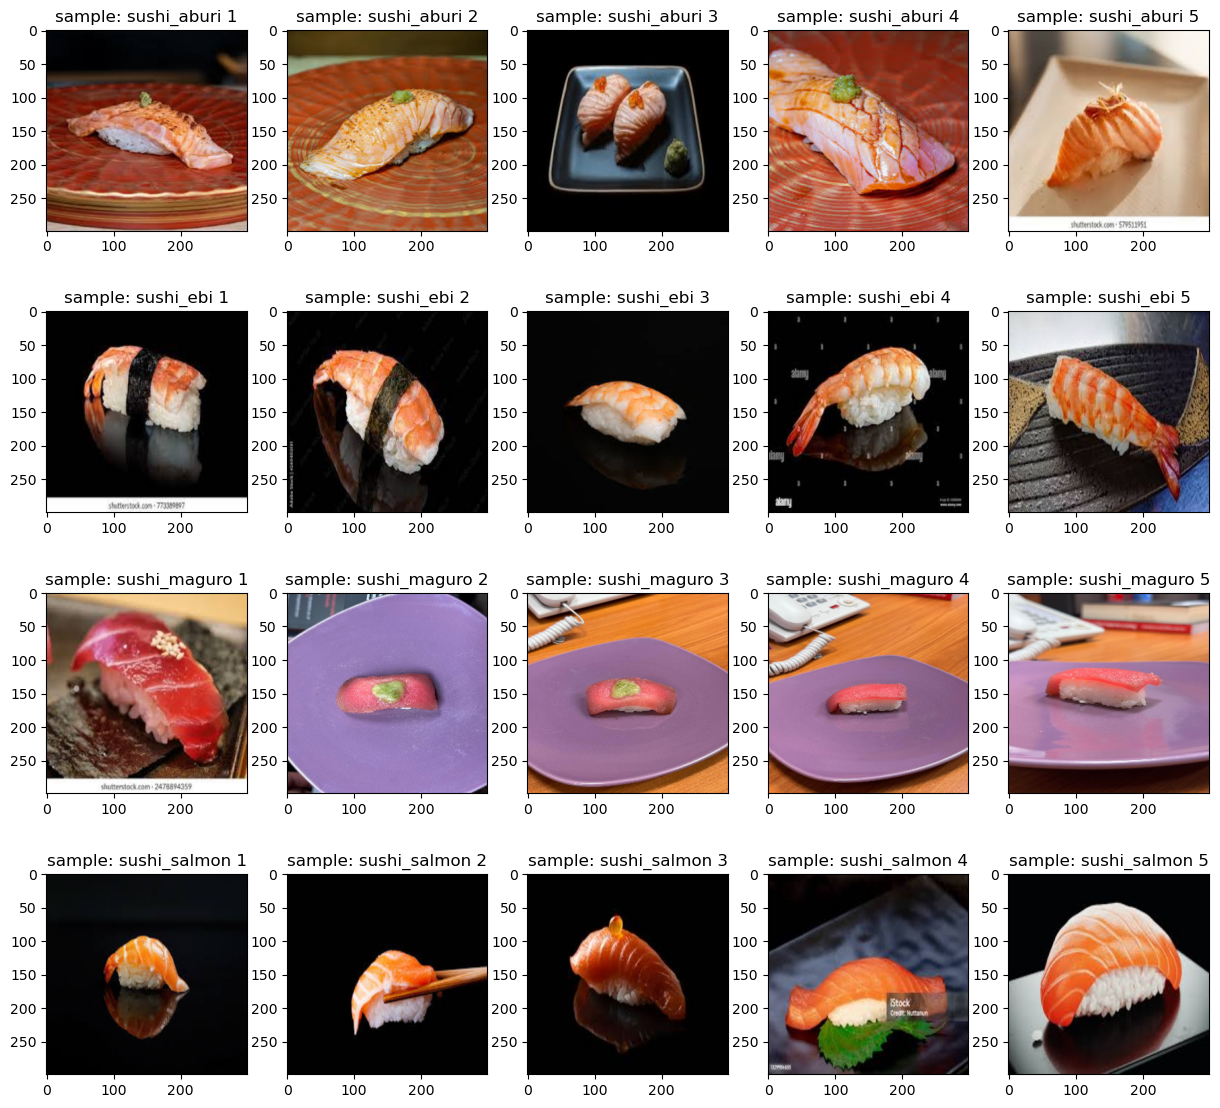

In [8]:
plt.figure(figsize=(15, 14))
row = len(x_all)
for i in range(row):
    for j in range(5):
        plt.subplot(row, 5, i * 5 + j + 1) 
        plt.title(f'sample: {list(name_path.keys())[i]} {j+1}')
        plt.imshow(x_all[i][j])
        #plt.axis('off')
plt.show()